# Learning a CStree

In [22]:
import numpy as np
import networkx as nx

import cstrees.cstree as ct
import cstrees.stage as st
import cstrees.learning as ctl
import cstrees.scoring as sc

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Create the true CStree

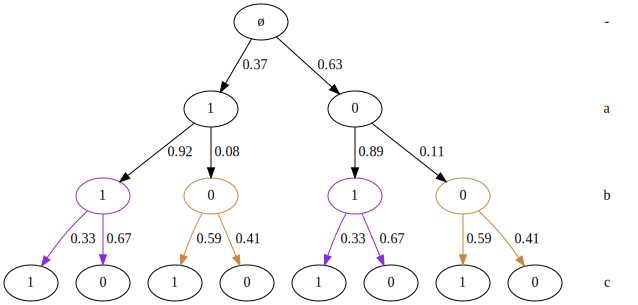

In [23]:
np.random.seed(5)
tree = ct.CStree([2] * 3, labels=["a", "b", "c"])

tree.update_stages({
    0: [st.Stage([0]), st.Stage([1])],
    1: [st.Stage([{0, 1}, 0]), st.Stage([{0, 1}, 1])]})

tree.sample_stage_parameters(alpha=1.0)
tree.plot(full=True)


Number of DAGs: 1
Context: None


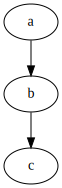

In [34]:
true_adags = tree.to_minimal_context_agraphs()
print("Number of DAGs:",len(true_adags))
print("Context:", list(true_adags.keys())[0])
list(true_adags.values())[0]

## Draw a lot of samples

In [25]:
df = tree.sample(10000)
df

,a,b,c
0,2,2,2
1,1,1,0
2,1,1,1
3,0,1,0
4,0,1,1
...,...,...,...
9996,0,1,0
9997,0,1,1
9998,0,1,1
9999,1,1,0


## Calculate score tables

In [26]:
score_table, context_scores, context_counts = sc.order_score_tables(df,
                                                                    max_cvars=2,
                                                                    poss_cvars=None,
                                                                    alpha_tot=1.0,
                                                                    method="BDeu")

Context score tables:   0%|          | 0/3 [00:00<?, ?it/s]

Order score tables: 100%|██████████| 3/3 [00:00<00:00, 401.23it/s]


In [27]:
score_table

{'max_cvars': 2,
 'poss_cvars': {'a': ['b', 'c'], 'b': ['a', 'c'], 'c': ['a', 'b']},
 'scores': {'a': {'None': -6594.953975546341,
   'b': -6591.079479095771,
   'c': -6595.232411953663,
   'b,c': -6591.744926603782},
  'b': {'None': -3339.4605348739606,
   'a': -3335.58603842339,
   'c': -3219.3370192623097,
   'a,c': -3217.6107909177226},
  'c': {'None': -6521.47738311331,
   'a': -6521.755819520632,
   'b': -6401.353867501659,
   'a,b': -6402.020393556794}}}

## Find the optimal order by exhaustive search

In [28]:
optord, score = ctl._find_optimal_order(score_table)
print("optimal order: {}, score {}".format(optord, score))

optimal order: ['b', 'c', 'a'], score -16332.559328979401


## Find the optimal CStree (staging of each level) of the best order

In [29]:
opttree = ctl._optimal_cstree_given_order(optord, context_scores)

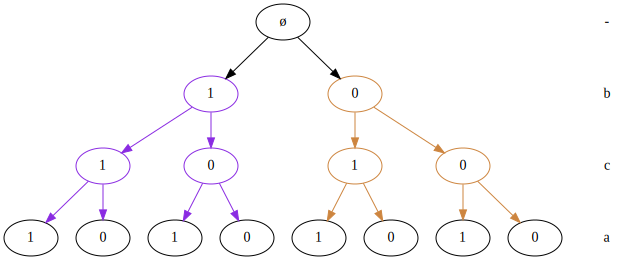

In [30]:
opttree.plot(full=True)

## Estimate the parameters

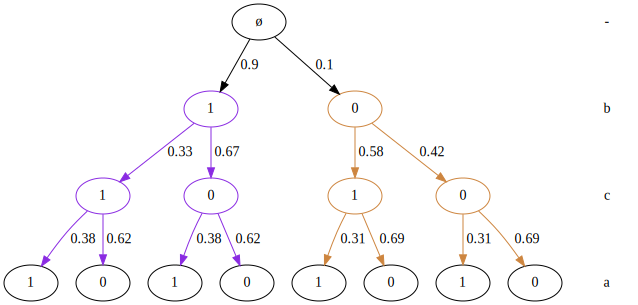

In [31]:
opttree.estimate_stage_parameters(df, alpha_tot=1.0, method="BDeu")
opttree.plot(full=True)


## Plot the minimal context DAGs

Number of DAGs: 1
Context: None


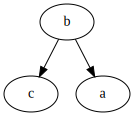

In [35]:
opt_adags = opttree.to_minimal_context_agraphs()
print("Number of DAGs:",len(opt_adags))
print("Context:", list(opt_adags.keys())[0])
list(opt_adags.values())[0]